<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_str_contains_Android.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852

---------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/vgsales.zip')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16598, 11)

### **1) Using “contains” to Find a Substring in a Pandas DataFrame**

- The **contains** method in Pandas allows you to search a **column** for a **specific substring.**

- The contains method returns **boolean** values for the Series with **True** for if the original Series value **contains the substring** and **False if not**.

- A basic application of contains should look like **Series.str.contains("substring").**

In [ ]:
pokemon_games = df.loc[df['Name'].str.contains("pokemon", case=False)]
pokemon_games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
81,82,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33


- Using the **loc** method allows us to **get only** the values in the DataFrame that contain the string **“pokemon”.**

- We’ve simply used the contains method to acquire **True and False** values based on **whether the “Name” column includes our substring and then returned only the True values.**

### **2) Using regex with the “contains” method in Pandas**

- In addition to just matching on a regular substring, we can also use contains to match on regular expressions. We’ll use the exact same format as before, except this time let’s use a bit of **regex** to only find the story-based Pokemon games (i.e. excluding Pokemon Pinball and the like).

In [ ]:
pokemon_og_games = df.loc[df['Name'].str.contains("pokemon \w{1,}/", case=False)]
pokemon_og_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49


- Above, I just used some simple regex to find strings that matched the pattern of **“pokemon” + “one character or more” + “/”.** The result of the new mask returned rows including **“Pokemon Red/Pokemon Blue”, “Pokemon Gold/Pokemon Silver”**, and more.

In [ ]:
sports_games = df.loc[df['Genre'] == 'Sports']
sports_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49


In [ ]:
football_soccer_games = sports_games.loc[df['Name'].str.contains("soccer|football", case=False)]
football_soccer_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
199,200,FIFA Soccer 11,PS3,2010.0,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
249,250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39
269,270,FIFA Soccer 06,PS2,2005.0,Sports,Electronic Arts,0.78,2.55,0.04,0.84,4.21
283,284,FIFA Soccer 07,PS2,2006.0,Sports,Electronic Arts,0.71,2.48,0.03,0.89,4.11
292,293,World Soccer Winning Eleven 9,PS2,2005.0,Sports,Konami Digital Entertainment,0.12,2.26,0.90,0.77,4.06


- Now we’ve gotten a DataFrame with just the games that have a name including **“soccer” or “football”.** We simply made use of the **“|” regex “or”** operator that allows you to match on a string that contains one or another substring.

In [ ]:
import re
football_soccer_games['Football/Soccer'] = football_soccer_games['Name'].str.findall('football|soccer', flags=re.IGNORECASE)
football_soccer_games['Football/Soccer']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


199        [Soccer]
249        [Soccer]
269        [Soccer]
283        [Soccer]
292        [Soccer]
            ...    
16076      [Soccer]
16118    [Football]
16400      [Soccer]
16420      [Soccer]
16558      [Soccer]
Name: Football/Soccer, Length: 299, dtype: object

- You’ll see at the end of the returned DataFrame a new column that contains **either “Soccer” or “Football”**, depending on which of the two the videogame name contains. This can be helpful if you need to create new columns based on the existing columns and using values from those columns.

- **3)** Finally, for a quick trick to **exclude strings** with just one additional operator on top of the basic contains method, let’s try to get all the football and soccer games that **don’t include “FIFA”** in the name.

In [ ]:
not_fifa = football_soccer_games.loc[~football_soccer_games['Name'].str.contains('FIFA')]
not_fifa.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Football/Soccer
249,250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39,[Soccer]
292,293,World Soccer Winning Eleven 9,PS2,2005.0,Sports,Konami Digital Entertainment,0.12,2.26,0.90,0.77,4.06,[Soccer]
315,316,World Soccer Winning Eleven 8 International,PS2,2004.0,Sports,Konami Digital Entertainment,0.16,1.89,1.12,0.68,3.85,[Soccer]
348,349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63,[Soccer]
474,475,World Soccer Winning Eleven 6 International,PS2,2002.0,Sports,Konami Digital Entertainment,0.12,1.26,1.16,0.45,2.99,[Soccer]


------------------------

In [ ]:
Android = pd.read_csv('/content/drive/MyDrive/TMLC/Android.zip')
Android.head(3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.0,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.0,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fort

In [ ]:
dangerous_cols = Android.columns[Android.columns.str.contains("\(D\)")].tolist()
safe_cols = Android.columns[Android.columns.str.contains("\(S\)")].tolist()

In [ ]:
dangerous_cols

['Development tools : enable application debugging (D)',
 'Development tools : limit number of running processes (D)',
 'Development tools : make all background applications close (D)',
 'Development tools : send Linux signals to applications (D)',
 'Hardware controls : change your audio settings (D)',
 'Hardware controls : record audio (D)',
 'Hardware controls : take pictures and videos (D)',
 'Network communication : control Near Field Communication (D)',
 'Network communication : create Bluetooth connections (D)',
 'Network communication : full Internet access (D)',
 'Network communication : make/receive Internet calls (D)',
 'Phone calls : intercept outgoing calls (D)',
 'Phone calls : read phone state and identity (D)',
 'Services that cost you money : directly call phone numbers (D)',
 'Services that cost you money : send SMS messages (D)',
 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
 'System tools : allow Wi-Fi Multicast reception (D)',
 

In [ ]:
safe_cols

['Default : Access DRM content. (S)',
 'Default : Access Email provider data (S)',
 'Default : Access all system downloads (S)',
 'Default : Access download manager. (S)',
 'Default : Advanced download manager functions. (S)',
 'Default : Audio File Access (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google service configuration (S)',
 'Default : Modify Google settings (S)',
 'Default : Move application resources (S)',
 'Default : Read Google settings (S)',
 'Default : Send download notifications. (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : access SurfaceFlinger (S)',
 'Default : access checkin properties (S)',
 'Default : access the cache filesystem (S)',
 'Default : access to passwords for Google accounts (S)',
 'Default : act as an account authenticator (S)',
 'Default : bind to a wallpaper (S)',
 'Default : bind to an input method (S)',
 'Default : change screen orientation (S)',
 'Default : coarse (network-based) location (S)',
 'Default : control

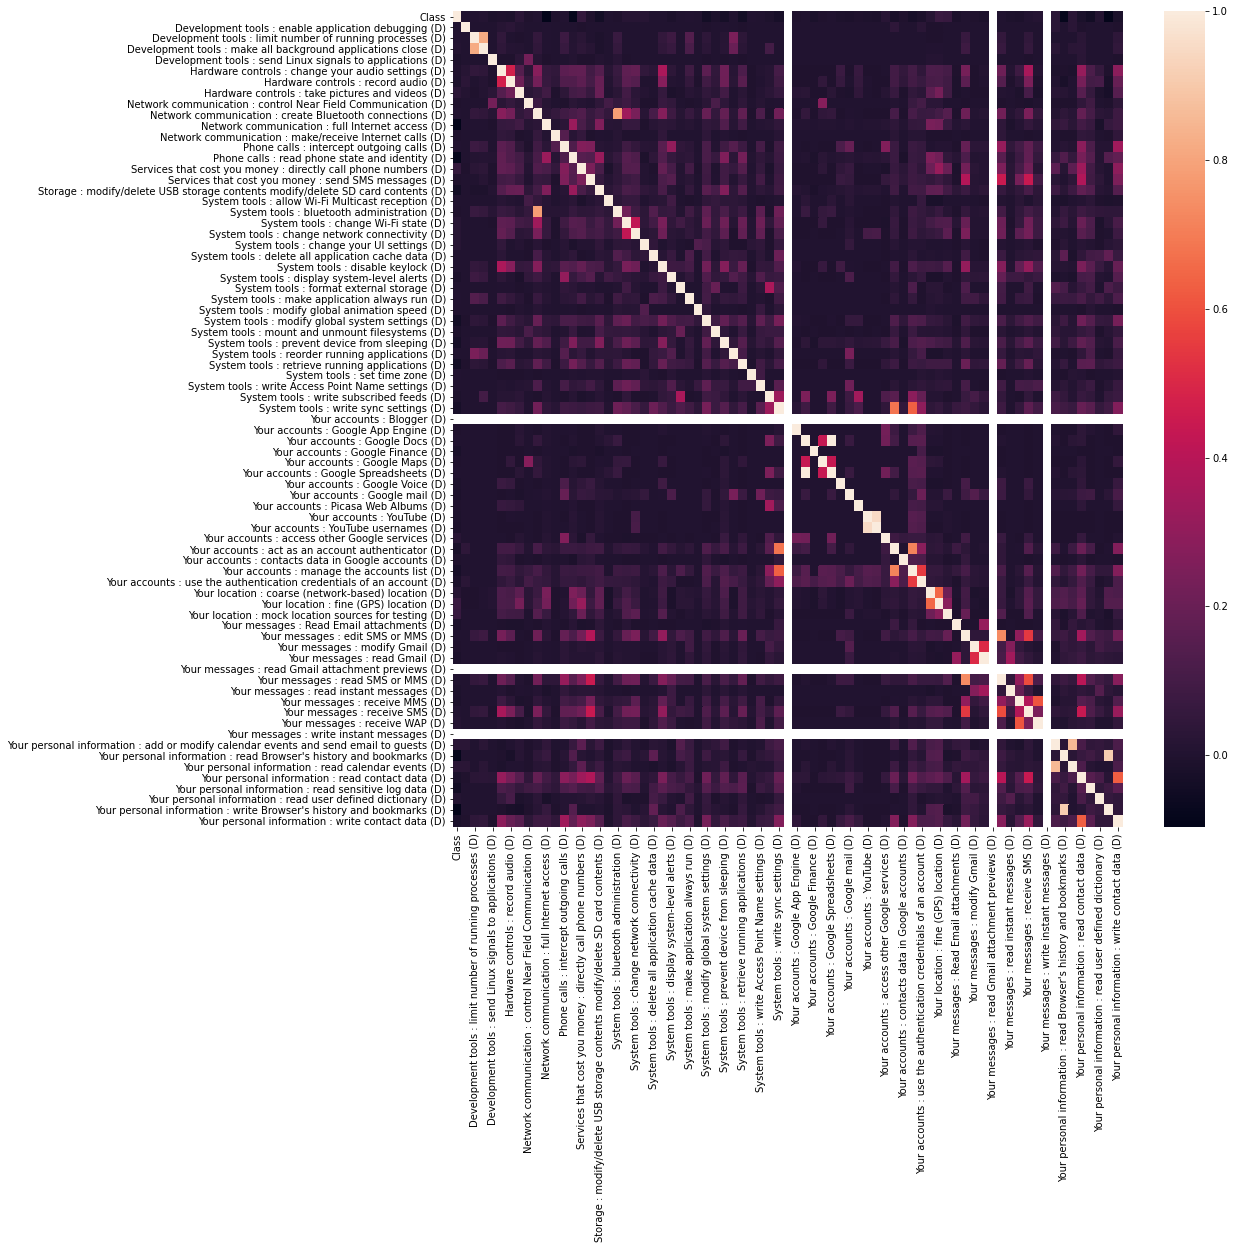

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(pd.concat([Android.iloc[:,[183]],  Android.loc[:,dangerous_cols]], axis=1).corr());

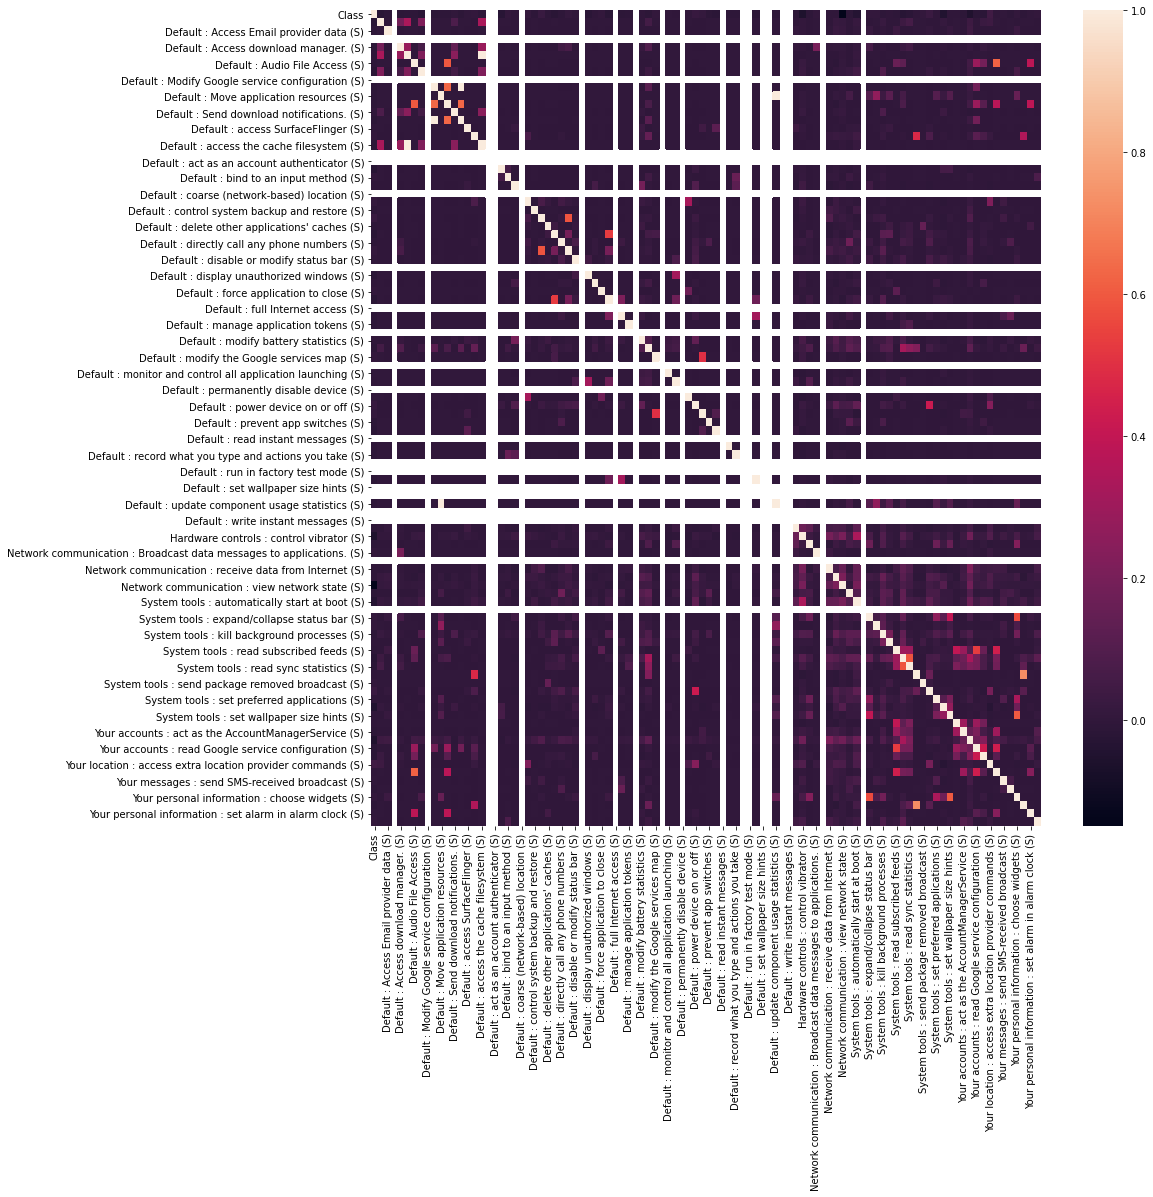

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(pd.concat([Android.iloc[:,[183]],  Android.loc[:,safe_cols]], axis=1).corr());

In [ ]:
data = Android[~Android.App.str.contains("[?]")]

data.App.value_counts()

TypeError: ignored